# Домашнее задание "Продвинутая линейная алгебра".

In [1]:
import numpy as np
from numpy import linalg

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


In [20]:
A = np.array([[1, 0], 
             [0, -1]])
# провера ортогональности
AT = A.transpose()
A.dot(AT)

array([[1, 0],
       [0, 1]])

In [13]:
B = np.array([[1, 2, 3], 
             [0, 2, 3], 
             [0, 0, 3]])

In [14]:
C = np.array([[1, 0, 0], 
             [1, 2, 0], 
             [1, 2, 3]])

In [22]:
D = np.array([[5, 7], 
             [2, 3]])
# провера детерминанта
linalg.det(D)

0.9999999999999987

Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [24]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [25]:
linalg.eig(m)

(array([1., 4.]),
 array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [26]:
m = np.array([[1, 2],
              [2, 3]])
print(m)

[[1 2]
 [2 3]]


In [28]:
v, w = np.linalg.eigh(m)

In [29]:
D = np.diag(v)

In [30]:
S = w.T

In [32]:
S.T @ D @ S

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*





--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


In [2]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

<Figure size 432x288 with 0 Axes>

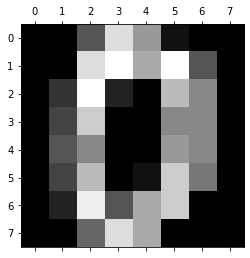

In [3]:
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [4]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [42]:
X = digits.data 
y = digits.target
X_scale = scale(X,axis=0)
pcs = [] 
mss = [] 
for n in range(1,10):
    pcs.append(n) 
    pca = PCA(n_components=n)
    recon = pca.inverse_transform(pca.fit_transform(X_scale))
    mse = mean_squared_error(X_scale[0], recon[0], squared=True)
    mss.append(mse)    

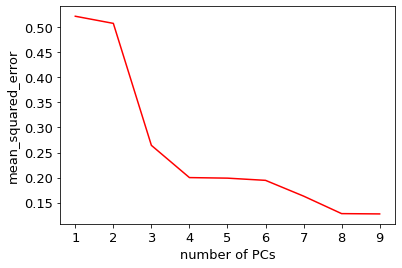

In [43]:
plt.plot(pcs, mss, 'r') 
plt.xlabel('number of PCs',fontsize = 13) 
plt.ylabel('mean_squared_error',fontsize = 13) 

plt.xticks(pcs,fontsize=13) 
plt.yticks(fontsize=13) 
plt.show() 